In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

euk = pd.read_csv("eukaryotes.tsv", sep = "\t", na_values = ["-"])
euk["Kingdom"].nunique(), euk["Class"].nunique()

(5, 19)

In [3]:
euk["Species"].nunique()

4936

In [7]:
# Most species are present only once in the dataset

euk["Species"].value_counts().value_counts().head()

1    4051
2     538
3     150
4      62
5      27
Name: Species, dtype: int64

In [12]:
# Summarize GC percentage for kingdoms by calculating the median

for k in euk["Kingdom"].unique():
    my_kingdom = euk[euk["Kingdom"] == k]
    print(k, my_kingdom["GC%"].median())

Protists 47.7
Plants 38.8437
Fungi 47.5
Animals 40.8
Other 46.905


In [15]:
euk.groupby("Kingdom").size(), euk["Kingdom"].value_counts()

# With groupby the counts are ordered alphabetically by the index
# With value_counts the most common value is listed first

(Kingdom
 Animals     2181
 Fungi       4494
 Other         30
 Plants       870
 Protists     727
 dtype: int64,
 Fungi       4494
 Animals     2181
 Plants       870
 Protists     727
 Other         30
 Name: Kingdom, dtype: int64)

In [16]:
euk.groupby(["Kingdom", "Assembly status"]).size()

# The output: a list of values (counts) where each value has two labels

Kingdom   Assembly status
Animals   Chromosome          246
          Complete Genome       1
          Contig              203
          Scaffold           1731
Fungi     Chromosome          681
          Complete Genome      50
          Contig              973
          Scaffold           2790
Other     Chromosome            6
          Complete Genome       1
          Contig                9
          Scaffold             14
Plants    Chromosome          187
          Complete Genome       2
          Contig              238
          Scaffold            443
Protists  Chromosome          101
          Complete Genome       7
          Contig              160
          Scaffold            459
dtype: int64

In [18]:
# Extract individual columns from a GroupBy object
euk.groupby("Kingdom")["GC%"]

# Mean GC% for each kingdom
euk.groupby("Kingdom")["GC%"].mean()

Kingdom
Animals     38.979311
Fungi       45.708512
Other       46.600059
Plants      40.702560
Protists    43.159938
Name: GC%, dtype: float64

In [19]:
# Median genome size for each assembly status
euk.groupby("Assembly status")["Size (Mb)"].median()

Assembly status
Chromosome         13.0771
Complete Genome    15.9383
Contig             35.8714
Scaffold           44.9756
Name: Size (Mb), dtype: float64

In [22]:
# The max GC% for each combination of kingdom and status

euk.groupby(["Kingdom", "Assembly status"])["GC%"].max()

Kingdom   Assembly status
Animals   Chromosome         49.2464
          Complete Genome    35.4317
          Contig             64.3000
          Scaffold           60.2000
Fungi     Chromosome         59.5059
          Complete Genome    59.1833
          Contig             67.5000
          Scaffold           67.5000
Other     Chromosome         53.4936
          Complete Genome    55.0171
          Contig             55.5000
          Scaffold           65.7288
Plants    Chromosome         63.8270
          Complete Genome    63.8223
          Contig             73.5000
          Scaffold           71.4000
Protists  Chromosome         59.7916
          Complete Genome    59.7642
          Contig             63.4000
          Scaffold           67.4000
Name: GC%, dtype: float64

In [25]:
# Picking multiple columns to summarize

euk.groupby("Kingdom")[["Number of genes", "Number of proteins"]].mean()

,Number of genes,Number of proteins
Kingdom,,
Animals,21475.202284,28342.721044
Fungi,10176.505426,10041.961240
Other,13086.466667,13027.800000
Plants,34303.465608,38652.698413
Protists,10722.800000,10619.056818


In [27]:
euk.groupby('Class')[['Number of genes', 'Number of proteins']].median()

,Number of genes,Number of proteins
Class,,
Amphibians,24367.0,34243.0
Apicomplexans,5815.0,5653.0
Ascomycetes,9925.0,9929.0
Basidiomycetes,9174.5,9133.0
Birds,16121.0,18359.0
Fishes,26863.5,41806.0
Flatworms,13634.0,13631.0
Green Algae,9847.5,10103.5
Insects,14717.0,20551.0


Text(0.5, 1.05, 'Median number of genes and proteins for genomes in each class')

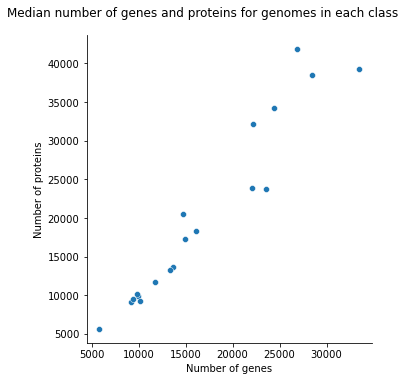

In [26]:
g = sns.relplot(
    data=euk.groupby('Class')[['Number of genes', 'Number of proteins']].median(),
    x='Number of genes', y='Number of proteins'
)

g.fig.suptitle('Median number of genes and proteins for genomes in each class', y=1.05)

In [28]:
# Taking a simple column and summarizing it in multiple ways

euk.groupby("Kingdom")["Size (Mb)"].agg([np.mean, np.median])

,mean,median
Kingdom,,
Animals,1128.217706,619.30100
Fungi,31.564293,29.95100
Other,93.289994,68.69715
Plants,800.261036,364.02650
Protists,48.429596,34.15200


In [5]:
summary = euk.groupby(['Kingdom', 'Assembly status'])[['Number of genes', 'Number of proteins']].agg([np.mean, np.median])
#summary.columns = ['Kingdom', 'Assembly status', 'Mean N genes', 'Median N genes', 'Mean N proteins', 'Median N proteins']

#summary = summary.rename(columns={'Assembly status': 'Assembly'})
summary.head(10)

Number of genes          Number of proteins         
                                   mean   median               mean   median
Kingdom Assembly status                                                     
Animals Chromosome         27715.653846  26671.0       41194.875000  42019.0
        Complete Genome    46857.000000  46857.0       28420.000000  28420.0
        Contig             14660.833333  15112.5       17969.333333  18902.5
        Scaffold           20280.411290  18253.5       25898.727823  23426.5
Fungi   Chromosome          7650.397906   6848.0        6739.816754   5420.0
        Complete Genome     6805.600000   5407.5        6483.736842   5155.0
        Contig             10239.382075  10253.5       10165.339623  10217.0
        Scaffold           10795.392157  10442.0       10816.338710  10548.0
Other   Chromosome          7980.800000  10398.0        7865.200000  10408.0
        Complete Genome     5373.000000   5373.0        4803.000000   4803.0

In [6]:
# Make table showing the mean number of genes and proteins along with the number of genomes for each class

euk.groupby('Class')[['Number of genes', 'Number of proteins']].agg([np.mean, len]).head()

Number of genes       Number of proteins      
                          mean   len               mean   len
Class                                                        
Amphibians        26670.250000     7       37515.250000     7
Apicomplexans      5993.210084   254        5869.142857   254
Ascomycetes        9846.421053  3570        9687.493548  3570
Basidiomycetes    11231.524000   726       11118.984064   726
Birds             17238.402439   172       23245.365854   172

In [22]:
(euk.groupby(['Class', 'Kingdom'], as_index=False)[['Number of genes', 'Number of proteins', 'Species']]
    .agg({
        'Number of genes': np.median,
        'Number of proteins': np.median,
        'Species': len
         })
).head()

,Class,Kingdom,Number of genes,Number of proteins,Species
0,Amphibians,Animals,24367.0,34243.0,7
1,Apicomplexans,Protists,5815.0,5653.0,254
2,Ascomycetes,Fungi,9925.0,9929.0,3570
3,Basidiomycetes,Fungi,9174.5,9133.0,726
4,Birds,Animals,16121.0,18359.0,172


Text(0.5, 1.05, 'Median N of genes and proteins for genomes in each class')

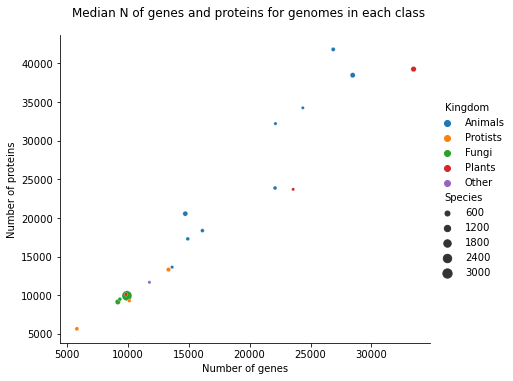

In [33]:
data = (euk.groupby(['Class', 'Kingdom'], as_index=False)[['Number of genes', 'Number of proteins', 'Species']]
    .agg({
        'Number of genes': np.median,
        'Number of proteins': np.median,
        'Species': len
         })
)

g = sns.relplot(
    data=data, x='Number of genes', y='Number of proteins', 
    hue='Kingdom', size='Species', sizes=(10,100), color='indigo', height=5, aspect=1.25
)
g.fig.suptitle('Median N of genes and proteins for genomes in each class', y=1.05)

In [45]:
# The same grouping as above, but filter to have only scaffold status

(
    euk[euk['Assembly status']  == 'Scaffold']
    .groupby(['Kingdom', 'Class'], as_index=False)[['Number of genes', 'Number of proteins', 'Species']]
    .agg({
            'Number of genes': np.median,
            'Number of proteins': np.median,
            'Species': len
         })
).head(10)

,Kingdom,Class,Number of genes,Number of proteins,Species
0,Animals,Amphibians,21704.5,26764.5,3
1,Animals,Birds,15630.0,17084.0,150
2,Animals,Fishes,26367.0,38580.0,212
3,Animals,Flatworms,13696.0,13632.5,40
4,Animals,Insects,14686.5,20244.0,497
5,Animals,Mammals,26990.5,37392.0,484
6,Animals,Other Animals,22086.0,23871.0,172
7,Animals,Reptiles,22151.0,31677.0,34
8,Animals,Roundworms,14808.0,17143.5,139
9,Fungi,Ascomycetes,10550.0,10662.0,2134


In [47]:
# Filtering based on group properties
# Selecting the rows belonging to classes with at least 1000 genomes

def check_df(group_df):
    if len(group_df)>1000:
        return True
    else:
        return False

euk.groupby('Class').filter(check_df)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8,Saccharomyces cerevisiae S288C,Fungi,Ascomycetes,12.157100,38.1556,6445.0,6002.0,1999,Complete Genome
10,Pneumocystis carinii B80,Fungi,Ascomycetes,7.661460,27.8000,3695.0,3646.0,2015,Contig
11,Schizosaccharomyces pombe,Fungi,Ascomycetes,12.591300,36.0381,6974.0,5132.0,2002,Chromosome
12,Aspergillus nidulans FGSC A4,Fungi,Ascomycetes,30.276000,50.2721,9586.0,9556.0,2003,Scaffold
13,Aspergillus fumigatus Af293,Fungi,Ascomycetes,29.385000,49.8105,19832.0,19260.0,2005,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2000,NaN,NaN,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298.0,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,NaN,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,NaN,2018,Chromosome


In [49]:
#def check_df(group_df):
#    return len(group_df)>1000

#euk.groupby("Class").filter(check_df)


# Using a lambda function
euk.groupby("Class").filter(lambda x: len(x) > 1000)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
8,Saccharomyces cerevisiae S288C,Fungi,Ascomycetes,12.157100,38.1556,6445.0,6002.0,1999,Complete Genome
10,Pneumocystis carinii B80,Fungi,Ascomycetes,7.661460,27.8000,3695.0,3646.0,2015,Contig
11,Schizosaccharomyces pombe,Fungi,Ascomycetes,12.591300,36.0381,6974.0,5132.0,2002,Chromosome
12,Aspergillus nidulans FGSC A4,Fungi,Ascomycetes,30.276000,50.2721,9586.0,9556.0,2003,Scaffold
13,Aspergillus fumigatus Af293,Fungi,Ascomycetes,29.385000,49.8105,19832.0,19260.0,2005,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2000,NaN,NaN,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298.0,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,NaN,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,NaN,2018,Chromosome


In [51]:
# Find all genomes belonging to species 
# where the genome with the most predicted genes has at least twice as many genes as the one with the fewest predicted genes

def species_filter(df):
    max_genes = df["Number of genes"].max()
    min_genes = df["Number of genes"].min()
    ratio = max_genes / min_genes
    return ratio>2

euk.dropna().groupby("Species").filter(species_filter)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311.0,48265.0,2001,Chromosome
6,Oryza sativa Japonica Group,Plants,Land Plants,374.423000,43.5769,35219.0,42580.0,2015,Chromosome
19,Trypanosoma cruzi,Protists,Kinetoplasts,89.937500,51.7000,23696.0,19607.0,2005,Scaffold
22,Eimeria tenella,Protists,Apicomplexans,51.894400,51.0796,8660.0,8609.0,2013,Scaffold
38,Aedes albopictus,Animals,Insects,2247.310000,40.3999,38274.0,42912.0,2016,Contig
...,...,...,...,...,...,...,...,...,...
8174,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.505300,38.3000,5597.0,5327.0,2017,Contig
8176,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.590100,38.1000,5603.0,5324.0,2018,Contig
8177,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.502000,38.1000,5554.0,5290.0,2018,Contig
8178,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.594200,38.1000,5598.0,5323.0,2018,Contig


In [53]:
# The same as above with lambda function

euk.dropna().groupby("Species").filter(lambda x: (x["Number of genes"].max()/ x["Number of genes"].min()) > 2)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311.0,48265.0,2001,Chromosome
6,Oryza sativa Japonica Group,Plants,Land Plants,374.423000,43.5769,35219.0,42580.0,2015,Chromosome
19,Trypanosoma cruzi,Protists,Kinetoplasts,89.937500,51.7000,23696.0,19607.0,2005,Scaffold
22,Eimeria tenella,Protists,Apicomplexans,51.894400,51.0796,8660.0,8609.0,2013,Scaffold
38,Aedes albopictus,Animals,Insects,2247.310000,40.3999,38274.0,42912.0,2016,Contig
...,...,...,...,...,...,...,...,...,...
8174,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.505300,38.3000,5597.0,5327.0,2017,Contig
8176,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.590100,38.1000,5603.0,5324.0,2018,Contig
8177,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.502000,38.1000,5554.0,5290.0,2018,Contig
8178,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.594200,38.1000,5598.0,5323.0,2018,Contig


In [3]:
# How many genomes for each kingdom are in each assembly status

temp = (
    euk[euk['Assembly status'].isin(['Contig', 'Scaffold'])]
    .groupby(['Kingdom', 'Assembly status'], as_index=False)
    .size()
)

temp = temp.rename(columns={'size': 'Genome count'})
temp

,Kingdom,Assembly status,Genome count
0,Animals,Contig,203
1,Animals,Scaffold,1731
2,Fungi,Contig,973
3,Fungi,Scaffold,2790
4,Other,Contig,9
5,Other,Scaffold,14
6,Plants,Contig,238
7,Plants,Scaffold,443
8,Protists,Contig,160
9,Protists,Scaffold,459


In [76]:
# Grouping temp by "Kingdom" and counting a total number of genomes for each kingdom

temp.groupby('Kingdom')['Genome count'].transform(sum)

0    1934
1    1934
2    3763
3    3763
4      23
5      23
6     681
7     681
8     619
9     619
Name: Genome count, dtype: int64

In [4]:
# Adding the values from above as a new column

temp['Total for kingdom'] = (temp.groupby('Kingdom')['Genome count'].transform(sum))
temp

,Kingdom,Assembly status,Genome count,Total for kingdom
0,Animals,Contig,203,1934
1,Animals,Scaffold,1731,1934
2,Fungi,Contig,973,3763
3,Fungi,Scaffold,2790,3763
4,Other,Contig,9,23
5,Other,Scaffold,14,23
6,Plants,Contig,238,681
7,Plants,Scaffold,443,681
8,Protists,Contig,160,619
9,Protists,Scaffold,459,619


In [5]:
# Putting everything together and adding a proportion column

# Make the summary table
temp = (
    euk[euk['Assembly status'].isin(['Contig', 'Scaffold'])]
    .groupby(['Kingdom', 'Assembly status'], as_index=False)
    .size()
)

# Rename the size column
temp = temp.rename(columns={'size': 'Genome count'})

# Calculate the totals and put them as a new column
temp['Total for kingdom'] = (temp.groupby('Kingdom')['Genome count'].transform(sum))

# Add a proportion column
temp['Proportion'] = temp['Genome count'] / temp['Total for kingdom']
temp

,Kingdom,Assembly status,Genome count,Total for kingdom,Proportion
0,Animals,Contig,203,1934,0.104964
1,Animals,Scaffold,1731,1934,0.895036
2,Fungi,Contig,973,3763,0.258570
3,Fungi,Scaffold,2790,3763,0.741430
4,Other,Contig,9,23,0.391304
5,Other,Scaffold,14,23,0.608696
6,Plants,Contig,238,681,0.349486
7,Plants,Scaffold,443,681,0.650514
8,Protists,Contig,160,619,0.258481
9,Protists,Scaffold,459,619,0.741519


Text(0.5, 1.0, 'Number of genomes in contig and scaffold for each kingdom')

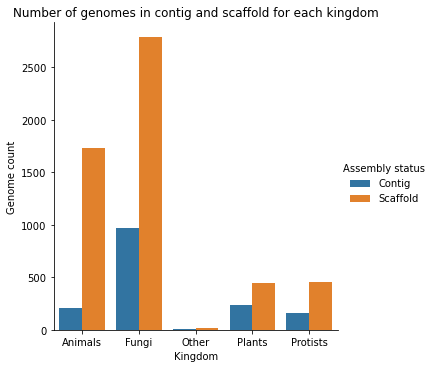

In [80]:
sns.catplot(data=temp, x='Kingdom', y="Genome count", kind='bar', hue='Assembly status')
plt.title('Number of genomes in contig and scaffold for each kingdom')

Text(0.5, 1.0, 'Fraction of genomes in contig and scaffold for each kingdom')

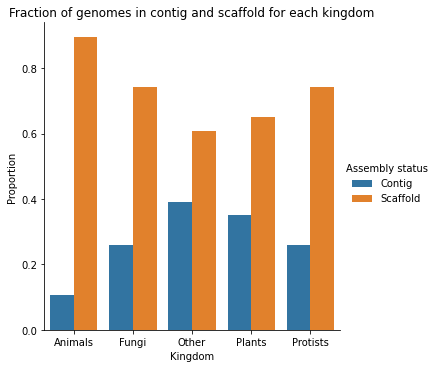

In [81]:
sns.catplot(data=temp, x='Kingdom', y="Proportion", kind='bar', hue='Assembly status')
plt.title('Fraction of genomes in contig and scaffold for each kingdom')

In [82]:
# Doing normalization directly in the transformation function

def normalize(counts):
    return counts / sum(counts)

temp.groupby("Kingdom")["Genome count"].transform(normalize)

0    0.104964
1    0.895036
2    0.258570
3    0.741430
4    0.391304
5    0.608696
6    0.349486
7    0.650514
8    0.258481
9    0.741519
Name: Genome count, dtype: float64

In [6]:
# Summary table: the total N of megabases sequenced for each kingdom in each year between 2001 and 2018

euk.head(10)
temp2 = (
    euk[euk["Publication year"].between(2001, 2018)]
    .groupby(["Publication year", "Kingdom"])["Size (Mb)"].sum()
    .to_frame("Total Mb sequenced")
    .reset_index()
)
temp2

,Publication year,Kingdom,Total Mb sequenced
0,2001,Animals,100.286000
1,2001,Fungi,2.497520
2,2001,Plants,119.669000
3,2002,Animals,9724.154100
4,2002,Fungi,12.729820
...,...,...,...
76,2018,Animals,606866.876615
77,2018,Fungi,51363.706170
78,2018,Other,265.241000
79,2018,Plants,181508.287200


In [7]:
# Normalizing by year

def normalize(size):
    return size / sum(size)

euk[euk["Publication year"].between(2001, 2018)].groupby(["Publication year", "Kingdom"])["Size (Mb)"].transform(normalize)

0       0.036646
1       1.000000
2       0.132325
3       0.052421
4       0.111957
          ...   
8296    0.000126
8297    0.000197
8299    0.000234
8300    0.000233
8301    0.000230
Name: Size (Mb), Length: 7626, dtype: float64

In [8]:
#def normalize(size):
#    return size / sum(size)

temp2["Proportion Mb sequenced"] = temp2.groupby("Publication year")["Total Mb sequenced"].transform(lambda x: x / sum(x))
temp2

,Publication year,Kingdom,Total Mb sequenced,Proportion Mb sequenced
0,2001,Animals,100.286000,0.450820
1,2001,Fungi,2.497520,0.011227
2,2001,Plants,119.669000,0.537953
3,2002,Animals,9724.154100,0.952189
4,2002,Fungi,12.729820,0.001247
...,...,...,...,...
76,2018,Animals,606866.876615,0.715254
77,2018,Fungi,51363.706170,0.060537
78,2018,Other,265.241000,0.000313
79,2018,Plants,181508.287200,0.213926


Text(0.5, 1.05, 'Proportion of bases sequenced for each kingdom in each year since 2001')

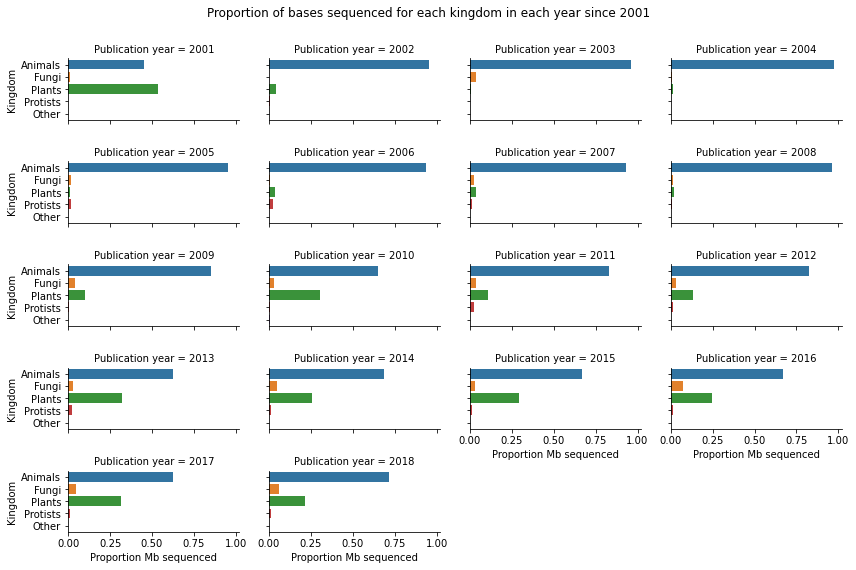

In [95]:
g = sns.catplot(
    data=temp2,
    x="Proportion Mb sequenced", y="Kingdom",
    col="Publication year",
    kind="bar", col_wrap=4,
    height=1.5, aspect=2
)

g.fig.suptitle("Proportion of bases sequenced for each kingdom in each year since 2001", y=1.05)

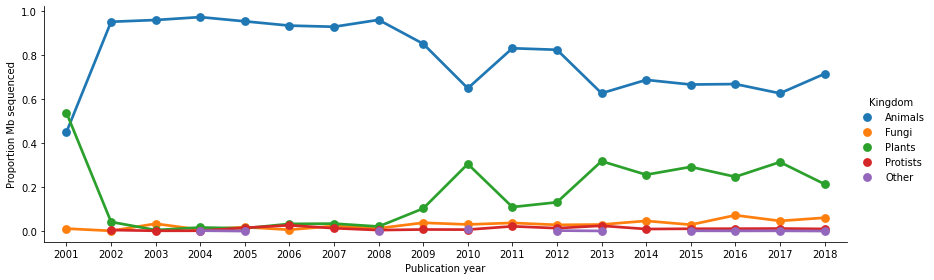

In [106]:
g = sns.catplot(
    data=temp2,
    x="Publication year", y="Proportion Mb sequenced",
    hue="Kingdom",
    kind="point", 
    aspect=3, height=4
)

In [11]:
# Scale the sequencing measure relative to the amount of bases sequenced in 2001

# Getting the number of bases sequenced in 2001 for each kingdom
# Taking the first row for each group dataframe
temp2[temp2["Kingdom"].isin(["Plants", "Animals", "Fungi"])].groupby("Kingdom")["Total Mb sequenced"].apply(lambda x: x.iloc[0])

Kingdom
Animals    100.28600
Fungi        2.49752
Plants     119.66900
Name: Total Mb sequenced, dtype: float64

In [13]:
# Scaling all the values relative to this first value
(
temp2[temp2["Kingdom"].isin(["Plants", "Animals", "Fungi"])]
    .groupby("Kingdom")["Total Mb sequenced"]
    .transform(lambda x: x / x.iloc[0]).head(10)
)

0       1.000000
1       1.000000
2       1.000000
3      96.964223
4       5.096984
5       3.562635
7      84.487725
8     118.545757
9       0.362186
11    231.027074
Name: Total Mb sequenced, dtype: float64

In [15]:
# Adding this new series to the original dataframe

temp2["Increase relative to 2001"] = (
    temp2[temp2["Kingdom"].isin(["Plants", "Animals", "Fungi"])]
    .groupby("Kingdom")["Total Mb sequenced"]
    .transform(lambda x: x / x.iloc[0])
)
temp2

,Publication year,Kingdom,Total Mb sequenced,Proportion Mb sequenced,Increase relative to 2001
0,2001,Animals,100.286000,0.450820,1.000000
1,2001,Fungi,2.497520,0.011227,1.000000
2,2001,Plants,119.669000,0.537953,1.000000
3,2002,Animals,9724.154100,0.952189,96.964223
4,2002,Fungi,12.729820,0.001247,5.096984
...,...,...,...,...,...
76,2018,Animals,606866.876615,0.715254,6051.361871
77,2018,Fungi,51363.706170,0.060537,20565.883825
78,2018,Other,265.241000,0.000313,NaN
79,2018,Plants,181508.287200,0.213926,1516.752770


Text(0.5, 1.0, 'Increase in bases sequenced relative to 2001 for each kingdom')

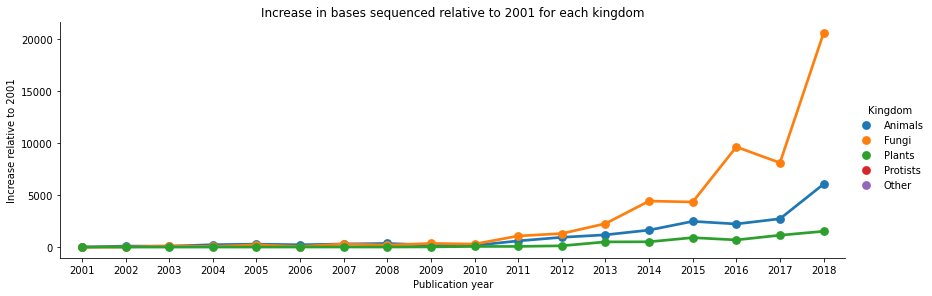

In [18]:
sns.catplot(data=temp2, x="Publication year", y="Increase relative to 2001",
    hue="Kingdom",
    kind="point", 
    aspect=3, height=4
)

plt.title("Increase in bases sequenced relative to 2001 for each kingdom")

In [19]:
for label, group_df in euk.groupby("Kingdom"):
    print(label, len(group_df))

Animals 2181
Fungi 4494
Other 30
Plants 870
Protists 727


In [22]:
for label, group_df in euk.groupby(["Kingdom", "Assembly status"]):
    print(label)

('Animals', 'Chromosome')
('Animals', 'Complete Genome')
('Animals', 'Contig')
('Animals', 'Scaffold')
('Fungi', 'Chromosome')
('Fungi', 'Complete Genome')
('Fungi', 'Contig')
('Fungi', 'Scaffold')
('Other', 'Chromosome')
('Other', 'Complete Genome')
('Other', 'Contig')
('Other', 'Scaffold')
('Plants', 'Chromosome')
('Plants', 'Complete Genome')
('Plants', 'Contig')
('Plants', 'Scaffold')
('Protists', 'Chromosome')
('Protists', 'Complete Genome')
('Protists', 'Contig')
('Protists', 'Scaffold')


In [23]:
for label, group_df in euk.groupby("Kingdom"):
    filename = label + ".csv"
    group_df.to_csv(filename, index=False)

In [24]:
euk.groupby("Class")["Number of genes"].median()

Class
Amphibians        24367.0
Apicomplexans      5815.0
Ascomycetes        9925.0
Basidiomycetes     9174.5
Birds             16121.0
Fishes            26863.5
Flatworms         13634.0
Green Algae        9847.5
Insects           14717.0
Kinetoplasts      10123.5
Land Plants       33462.0
Mammals           28462.0
Other             11771.0
Other Animals     22086.0
Other Fungi        9344.0
Other Plants      23573.5
Other Protists    13334.5
Reptiles          22121.5
Roundworms        14919.0
Name: Number of genes, dtype: float64